# Introduction

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In [346]:
import os
import os.path
import pandas as pd
import numpy as np
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import sklearn.model_selection as sk
import statistics
import scipy.stats as st
from sklearn import svm
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.reset_option('display.float_format')

pd.options.display.float_format = '{:.10f}'.format



In [347]:
df=pd.read_csv('lendingclub.csv')

In [148]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,NaN,2500,2500,2500.0000000000,36 months,13.5600000000,84.9200000000,10+ years,RENT,55000.0000000000,...,18.2400000000,0.0000000000,1.0000000000,NaN,45.0000000000,9.0000000000,1.0000000000,4341,10.3000000000,34.0000000000
1,NaN,30000,30000,30000.0000000000,60 months,18.9400000000,777.2300000000,10+ years,MORTGAGE,90000.0000000000,...,26.5200000000,0.0000000000,0.0000000000,71.0000000000,75.0000000000,13.0000000000,1.0000000000,12315,24.2000000000,44.0000000000
2,NaN,5000,5000,5000.0000000000,36 months,17.9700000000,180.6900000000,6 years,MORTGAGE,59280.0000000000,...,10.5100000000,0.0000000000,0.0000000000,NaN,NaN,8.0000000000,0.0000000000,4599,19.1000000000,13.0000000000
3,NaN,4000,4000,4000.0000000000,36 months,18.9400000000,146.5100000000,10+ years,MORTGAGE,92000.0000000000,...,16.7400000000,0.0000000000,0.0000000000,NaN,NaN,10.0000000000,0.0000000000,5468,78.1000000000,13.0000000000
4,NaN,30000,30000,30000.0000000000,60 months,16.1400000000,731.7800000000,10+ years,MORTGAGE,57250.0000000000,...,26.3500000000,0.0000000000,0.0000000000,NaN,NaN,12.0000000000,0.0000000000,829,3.6000000000,26.0000000000


In [149]:
df.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
2139953,NaN,30000,30000,30000.0000000000,60 months,30.7500000000,984.4700000000,6 years,MORTGAGE,100000.0000000000,...,22.1300000000,0.0000000000,2.0000000000,NaN,NaN,9.0000000000,0.0000000000,19206,66.9000000000,14.0000000000
2139954,NaN,12000,12000,12000.0000000000,60 months,14.0800000000,279.7200000000,10+ years,MORTGAGE,58000.0000000000,...,20.8800000000,0.0000000000,0.0000000000,NaN,NaN,12.0000000000,0.0000000000,9592,39.2000000000,34.0000000000
2139955,NaN,10000,10000,10000.0000000000,36 months,11.9900000000,332.1000000000,10+ years,OWN,64000.0000000000,...,12.9600000000,0.0000000000,0.0000000000,NaN,NaN,6.0000000000,0.0000000000,7094,70.9000000000,13.0000000000
2139956,NaN,12000,12000,12000.0000000000,60 months,21.4500000000,327.6900000000,NaN,RENT,60000.0000000000,...,30.8200000000,2.0000000000,1.0000000000,7.0000000000,NaN,8.0000000000,0.0000000000,12927,34.9000000000,17.0000000000
2139957,NaN,16550,16550,16550.0000000000,60 months,21.4500000000,451.9400000000,3 years,RENT,60000.0000000000,...,18.4000000000,0.0000000000,1.0000000000,NaN,NaN,13.0000000000,0.0000000000,25760,50.8000000000,14.0000000000


In [150]:
df.shape

(2139958, 22)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139958 entries, 0 to 2139957
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   member_id               float64
 1   loan_amnt               int64  
 2   funded_amnt             int64  
 3   funded_amnt_inv         float64
 4   term                    object 
 5   int_rate                float64
 6   installment             float64
 7   emp_length              object 
 8   home_ownership          object 
 9   annual_inc              float64
 10  verification_status     object 
 11  purpose                 object 
 12  dti                     float64
 13  delinq_2yrs             float64
 14  inq_last_6mths          float64
 15  mths_since_last_delinq  float64
 16  mths_since_last_record  float64
 17  open_acc                float64
 18  pub_rec                 float64
 19  revol_bal               int64  
 20  revol_util              float64
 21  total_acc               float64

In [152]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,0.0000000000,2139958.0000000000,2139958.0000000000,2139958.0000000000,2139958.0000000000,2139958.0000000000,2139954.0000000000,2139958.0000000000,2139929.0000000000,2139928.0000000000,1048793.0000000000,342260.0000000000,2139929.0000000000,2139929.0000000000,2139958.0000000000,2138406.0000000000,2139929.0000000000
mean,NaN,14788.2755642868,14782.7159575094,14763.7123423515,13.0594932283,439.3168645277,79001.0834085736,18.0931638238,0.3099686952,0.5872043358,34.5022697520,71.9048413487,11.6393235477,0.1999080343,16659.4885357563,50.5159027191,24.2450375690
std,NaN,9035.8172714423,9033.6890414570,9037.5297629812,4.7959198775,263.3822093557,115076.3576656682,8.4254083994,0.8723210372,0.8946092802,21.8968066552,26.5307781263,5.6435637463,0.5774349294,22975.9552206189,24.6244731961,12.0083327916
min,NaN,500.0000000000,500.0000000000,0.0000000000,5.3100000000,4.9300000000,1896.0000000000,-1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
25%,NaN,8000.0000000000,8000.0000000000,8000.0000000000,9.4900000000,249.1300000000,47400.0000000000,11.7800000000,0.0000000000,0.0000000000,16.0000000000,54.0000000000,8.0000000000,0.0000000000,5985.0000000000,31.8000000000,15.0000000000
50%,NaN,12250.0000000000,12250.0000000000,12175.0000000000,12.6200000000,373.2200000000,65300.0000000000,17.6000000000,0.0000000000,0.0000000000,31.0000000000,74.0000000000,11.0000000000,0.0000000000,11328.0000000000,50.5000000000,22.0000000000
75%,NaN,20000.0000000000,20000.0000000000,20000.0000000000,15.8800000000,581.6900000000,95000.0000000000,24.0400000000,0.0000000000,1.0000000000,50.0000000000,92.0000000000,14.0000000000,0.0000000000,20209.0000000000,69.5000000000,31.0000000000
max,NaN,40000.0000000000,40000.0000000000,40000.0000000000,30.9900000000,1719.8300000000,110000000.0000000000,49.9600000000,58.0000000000,33.0000000000,226.0000000000,129.0000000000,101.0000000000,86.0000000000,2904836.0000000000,892.3000000000,176.0000000000


In [348]:
# Check if rows contain duplicate data
duplicate_df=df[df.duplicated()]
print("number of duplicate rows", duplicate_df.shape)

number of duplicate rows (0, 22)


Target variable

In [154]:
df['int_rate'].value_counts()

11.9900000000    50816
5.3200000000     45844
10.9900000000    44084
13.9900000000    42109
11.4900000000    31109
                 ...  
14.2800000000        1
17.4100000000        1
17.4600000000        1
13.1900000000        1
18.7200000000        1
Name: int_rate, Length: 673, dtype: int64

Feature selection

In [155]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)
missing_fractions.head(20)
#replace NAs 

member_id                1.0000000000
mths_since_last_record   0.8400622816
mths_since_last_delinq   0.5099001943
emp_length               0.0609156815
revol_util               0.0007252479
inq_last_6mths           0.0000140190
delinq_2yrs              0.0000135517
pub_rec                  0.0000135517
open_acc                 0.0000135517
total_acc                0.0000135517
annual_inc               0.0000018692
verification_status      0.0000000000
loan_amnt                0.0000000000
dti                      0.0000000000
home_ownership           0.0000000000
installment              0.0000000000
int_rate                 0.0000000000
term                     0.0000000000
funded_amnt_inv          0.0000000000
revol_bal                0.0000000000
dtype: float64

Text(0, 0.5, 'Feature count')

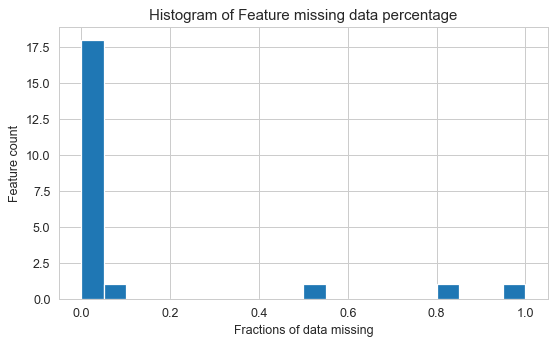

In [156]:
# Visualize the distribution of missing data.
plt.figure(figsize=(7,4),dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature missing data percentage')
plt.xlabel('Fractions of data missing')
plt.ylabel('Feature count')

Text(0, 0.5, '% missing data')

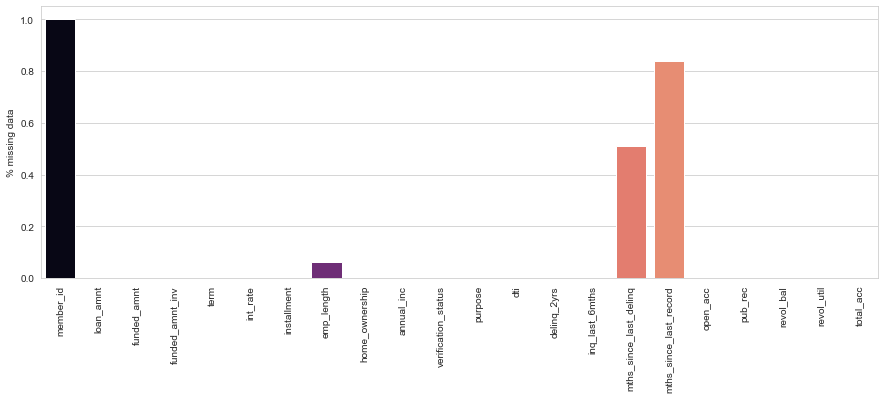

In [157]:
null_perc = df.isnull().sum()/df.isnull().count()

plt.figure(figsize=(15,5))

sns.barplot(x = np.arange(len(null_perc)), y =null_perc, palette="magma")

plt.xticks(np.arange(len(null_perc)),null_perc.index,rotation=90)
plt.ylabel('% missing data')

In [349]:
df.drop('member_id',axis=1,inplace=True)

In [350]:
# check the dataframe again
df.shape

(2139958, 21)

### Analyzing the distribution of data types

Text(0, 0.5, 'Data type')

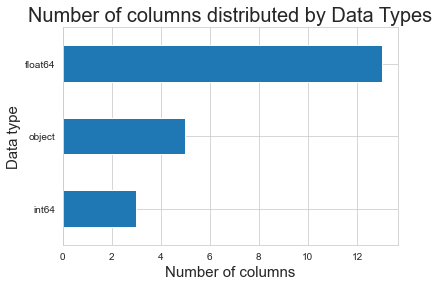

In [43]:
# Seeing the distribution of data types we are working with
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

### Numerical Features

In [44]:
df.select_dtypes('number').head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,2500,2500,2500.0,13.56,84.92,55000.0,18.24,0.0,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0
1,30000,30000,30000.0,18.94,777.23,90000.0,26.52,0.0,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0
2,5000,5000,5000.0,17.97,180.69,59280.0,10.51,0.0,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0
3,4000,4000,4000.0,18.94,146.51,92000.0,16.74,0.0,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0
4,30000,30000,30000.0,16.14,731.78,57250.0,26.35,0.0,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0


In [351]:
num_features=df.select_dtypes('number').columns.values
df[num_features].nunique().sort_values()

inq_last_6mths                28
delinq_2yrs                   37
pub_rec                       43
open_acc                      91
mths_since_last_record       129
total_acc                    152
mths_since_last_delinq       172
int_rate                     673
revol_util                  1426
loan_amnt                   1572
funded_amnt                 1572
dti                         4881
funded_amnt_inv            10052
annual_inc                 85803
installment                91360
revol_bal                 100368
dtype: int64

In [356]:
def outliers_proc(data, col_name, scale=3):
    """
    User for cleaning outliers
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

In [357]:
df[num_features].columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

Delete number is: 34851
Now column number is: 2105107
Description of data less than the lower bound is:
count   0.0000000000
mean             NaN
std              NaN
min              NaN
25%              NaN
50%              NaN
75%              NaN
max              NaN
Name: annual_inc, dtype: float64
Description of data larger than the upper bound is:
count       34851.0000000000
mean       379325.9277403803
std        796018.2846122192
min        237875.0000000000
25%        250000.0000000000
50%        300000.0000000000
75%        375000.0000000000
max     110000000.0000000000
Name: annual_inc, dtype: float64
Delete number is: 43996
Now column number is: 2061111
Description of data less than the lower bound is:
count   0.0000000000
mean             NaN
std              NaN
min              NaN
25%              NaN
50%              NaN
75%              NaN
max              NaN
Name: revol_bal, dtype: float64
Description of data larger than the upper bound is:
count     43996.000000

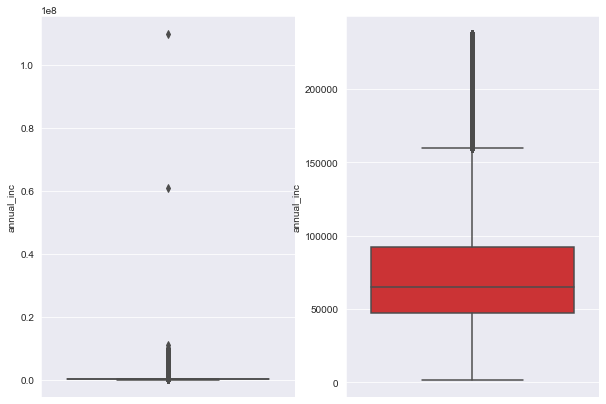

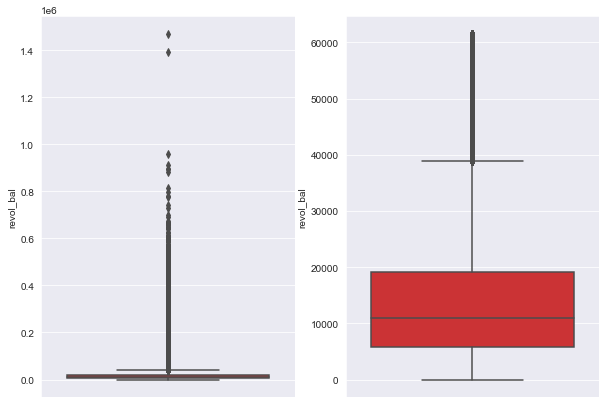

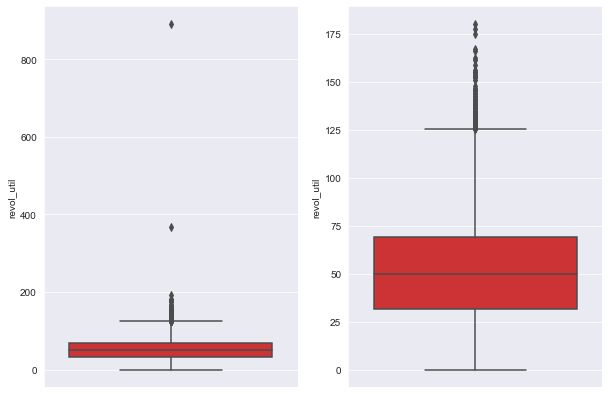

In [358]:
list1 = ['annual_inc','revol_bal', 'revol_util']
df2=df
# remove outliers for list1
for col in list1:
    df2=outliers_proc(df2,col)

In [361]:
df2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,2061107.0000000000,2061107.0000000000,2061107.0000000000,2061107.0000000000,2061107.0000000000,2061103.0000000000,2061107.0000000000,2061079.0000000000,2061078.0000000000,1012426.0000000000,335811.0000000000,2061079.0000000000,2061079.0000000000,2061107.0000000000,2059670.0000000000,2061079.0000000000
mean,14424.8879606930,14419.5669851201,14401.2787467764,13.1019315105,428.9912263948,72843.3025260362,18.1130767059,0.3086611430,0.5846324108,34.6148004891,72.1505847039,11.5119337978,0.2025594361,14057.0185604144,50.1808124797,23.9766874535
std,8778.8640290534,8776.6311573420,8780.1723957026,4.7893494797,255.3828745555,37052.6057393871,8.3905081770,0.8714901204,0.8913274413,21.8957727348,26.3740772635,5.5659216361,0.5756773151,11318.2219397183,24.5055942246,11.9015739942
min,500.0000000000,500.0000000000,0.0000000000,5.3100000000,4.9300000000,1896.0000000000,-1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
25%,8000.0000000000,8000.0000000000,7989.6657849156,9.5800000000,245.9700000000,46000.0000000000,11.8400000000,0.0000000000,0.0000000000,16.0000000000,55.0000000000,8.0000000000,0.0000000000,5839.0000000000,31.5000000000,15.0000000000
50%,12000.0000000000,12000.0000000000,12000.0000000000,12.6900000000,366.7600000000,65000.0000000000,17.6200000000,0.0000000000,0.0000000000,31.0000000000,74.0000000000,11.0000000000,0.0000000000,10951.0000000000,50.0000000000,22.0000000000
75%,20000.0000000000,20000.0000000000,20000.0000000000,15.9900000000,564.1400000000,90000.0000000000,24.0300000000,0.0000000000,1.0000000000,50.0000000000,92.0000000000,14.0000000000,0.0000000000,19061.0000000000,69.0000000000,31.0000000000
max,40000.0000000000,40000.0000000000,40000.0000000000,30.9900000000,1719.8300000000,237742.0000000000,49.9600000000,58.0000000000,33.0000000000,226.0000000000,129.0000000000,94.0000000000,86.0000000000,61578.0000000000,180.3000000000,176.0000000000


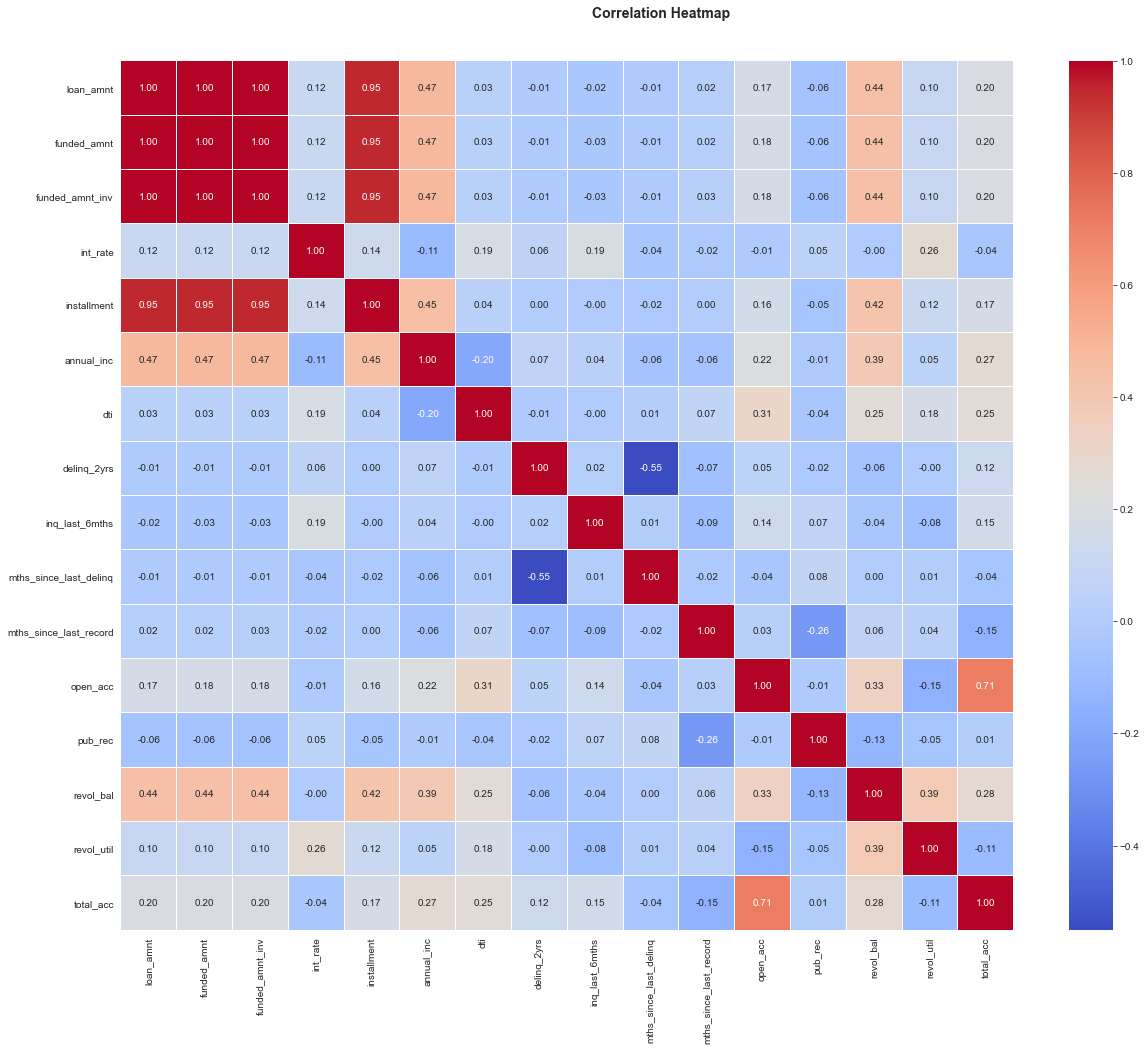

In [359]:
#Draw corelation heatmap
fig, (ax) = plt.subplots(1, 1, figsize=(20,15))
corr = df2.corr()
hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

ax.figure.savefig('correlation.png',bbox_inches="tight")

In [362]:
# same values for three columns: 'loan_amnt','funded_amnt_inv','funded_amnt', why choose?
# installment calculation
# analyze total_acc&open_acc
drop_highly_corr_features=['loan_amnt','funded_amnt_inv','funded_amnt','open_acc']

The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

In [376]:
df2.drop(labels=drop_highly_corr_features,axis=1,inplace=True)

In [377]:
remain_num_features=df.select_dtypes('number')
for name in remain_num_features.columns:
    print(name)

int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
pub_rec
revol_bal
revol_util
total_acc


### Categorical features

In [378]:
df2.select_dtypes('object').head()

,term,emp_length,home_ownership,verification_status,purpose
0,36 months,10+ years,RENT,Not Verified,debt_consolidation
1,60 months,10+ years,MORTGAGE,Source Verified,debt_consolidation
2,36 months,6 years,MORTGAGE,Source Verified,debt_consolidation
3,36 months,10+ years,MORTGAGE,Source Verified,debt_consolidation
4,60 months,10+ years,MORTGAGE,Not Verified,debt_consolidation


In [379]:
object_features=df2.select_dtypes('object').columns.values
df2[object_features].nunique().sort_values()

term                    2
verification_status     3
home_ownership          6
emp_length             11
purpose                14
dtype: int64

In [380]:
print("So now we are left with",df2.shape,"rows&columns.")

So now we are left with (1930358, 17) rows&columns.


### Detect Outliers

In [381]:
# filter dti
df2=df2[df2['dti']>0]

In [382]:
df2.describe()

,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,revol_util,total_acc
count,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000,1930358.0000000000
mean,13.0963045610,434.2320779880,74379.2212045745,18.0469984998,0.3125943478,0.5867636988,16.9849002102,11.3774398324,0.1970763972,14226.6612866629,50.4721424731,24.0768292721
std,4.7872359887,256.3233050334,37059.7217512861,8.3298867167,0.8776778793,0.8937163301,23.0722807916,28.2871533434,0.5722303069,11366.9502187793,24.4441227904,11.9134917234
min,5.3100000000,4.9300000000,1896.0000000000,0.0100000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000
25%,9.5800000000,250.2900000000,48000.0000000000,11.8200000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,5958.0000000000,31.9000000000,15.0000000000
50%,12.6900000000,372.2100000000,65000.0000000000,17.5500000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,11125.0000000000,50.4000000000,22.0000000000
75%,15.9900000000,571.4875000000,92000.0000000000,23.9000000000,0.0000000000,1.0000000000,31.0000000000,0.0000000000,0.0000000000,19294.7500000000,69.2000000000,31.0000000000
max,30.9900000000,1719.8300000000,237742.0000000000,49.9600000000,58.0000000000,33.0000000000,226.0000000000,129.0000000000,86.0000000000,61578.0000000000,177.7000000000,176.0000000000


### Imputing missing values [update:statistic summary]

In [383]:
# Again check the missing value count and precent in remaining columns
total=df2.isnull().sum().sort_values(ascending=False)
percent=(df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)*100
missing_data_status=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data_status

,total,percent
term,0,0.0000000000
delinq_2yrs,0,0.0000000000
revol_util,0,0.0000000000
revol_bal,0,0.0000000000
pub_rec,0,0.0000000000
mths_since_last_record,0,0.0000000000
mths_since_last_delinq,0,0.0000000000
inq_last_6mths,0,0.0000000000
dti,0,0.0000000000
int_rate,0,0.0000000000


In [370]:
# fill 0
df2['mths_since_last_record'].fillna(0,inplace=True)
df2['mths_since_last_delinq'].fillna(0,inplace=True)

In [384]:
missing_fractions_replaceNA = df2.isnull().mean().sort_values(ascending=False)
missing_fractions_replaceNA.head(20)

term                     0.0000000000
delinq_2yrs              0.0000000000
revol_util               0.0000000000
revol_bal                0.0000000000
pub_rec                  0.0000000000
mths_since_last_record   0.0000000000
mths_since_last_delinq   0.0000000000
inq_last_6mths           0.0000000000
dti                      0.0000000000
int_rate                 0.0000000000
purpose                  0.0000000000
verification_status      0.0000000000
annual_inc               0.0000000000
home_ownership           0.0000000000
emp_length               0.0000000000
installment              0.0000000000
total_acc                0.0000000000
dtype: float64

In [385]:
df.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [372]:
df2.dropna(subset=['inq_last_6mths','total_acc','pub_rec','open_acc','delinq_2yrs','annual_inc','revol_util','emp_length'],inplace=True)

In [373]:
df2.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
mths_since_last_record    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
dtype: int64

# Feature Analysis

In [374]:
df2.shape

(1930358, 21)

In [388]:
df3 = df2

### Installment Amount VS Interest rate

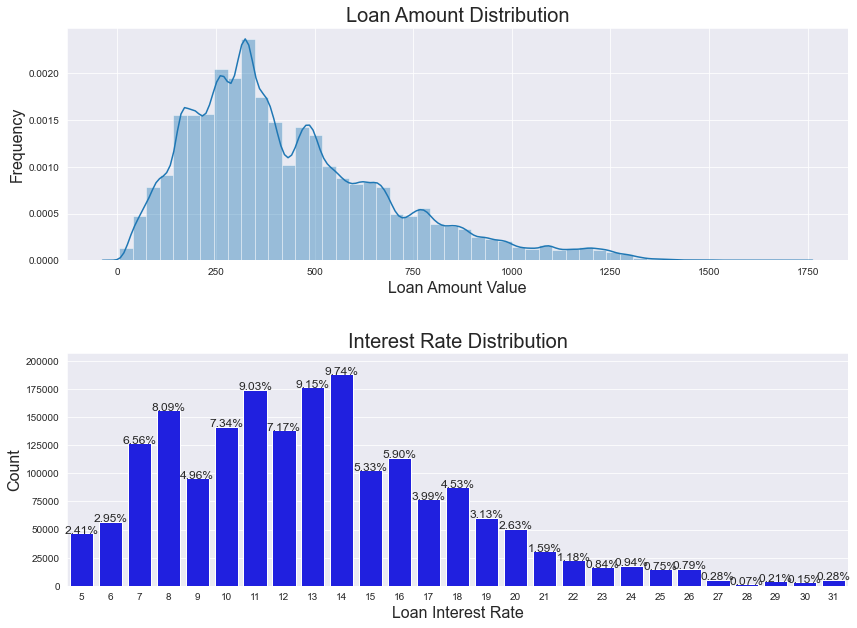

In [387]:
total=len(df2)
df2['int_rate']=df2['int_rate'].round(0).astype(int)

# loan_amount plot
plt.figure(figsize=(14,10))
plt.subplot(211)
g=sns.distplot(df2['installment'])
g.set_xlabel('Loan Amount Value',fontsize=16)
g.set_ylabel('Frequency',fontsize=16)
g.set_title('Loan Amount Distribution',fontsize=20)

# interest_rate plot
plt.subplot(212)
g1=sns.countplot(x=df2['int_rate'],data=df2,color='blue')
g1.set_xlabel('Loan Interest Rate',fontsize=16)
g1.set_ylabel('Count',fontsize=16)
g1.set_title('Interest Rate Distribution',fontsize=20)
sizes=[]# Get highest values in y
for p in g1.patches:
    height=p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha='center',fontsize=12)
g1.set_ylim(0,max(sizes)*1.10) #set y limit based on highest heights
plt.subplots_adjust(hspace=0.4,top=0.9)
plt.show()

In [252]:
df2['installment'].describe()

count   2058339.0000000000
mean        429.0987442112
std         255.3249321802
min           4.9300000000
25%         246.0500000000
50%         366.8200000000
75%         564.1800000000
max        1719.8300000000
Name: installment, dtype: float64

In [275]:
df2['installment_cut']= pd.qcut(df2['installment'], q=5)

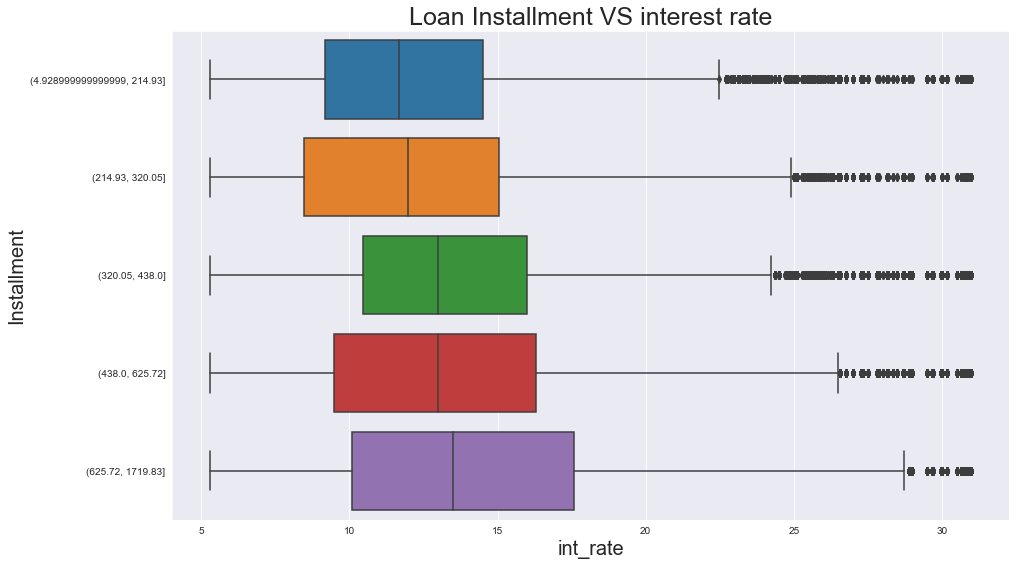

In [274]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(y="installment_cut", x="int_rate", data=df2)
ax = plt.xlabel('int_rate',fontsize=20)
ax = plt.ylabel('Installment',fontsize=20)
ax = plt.title('Loan Installment VS interest rate',fontsize=25)

### Aunual Income

In [233]:
df2['annual_inc'].describe()

count   2058339.0000000000
mean      72852.4162177371
std       37044.8514618006
min        1896.0000000000
25%       46000.0000000000
50%       65000.0000000000
75%       90000.0000000000
max      237742.0000000000
Name: annual_inc, dtype: float64

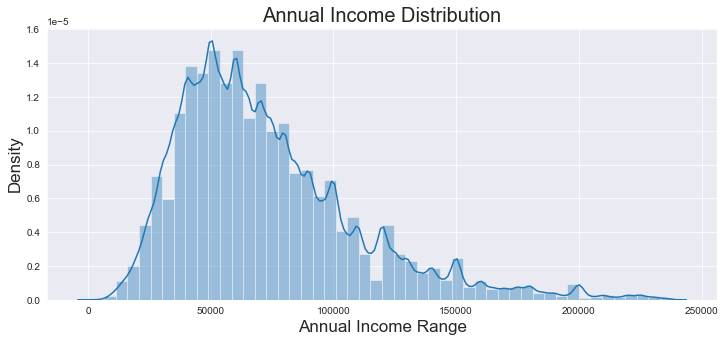

In [238]:
plt.figure(figsize=(12,5))

sns.distplot(df2['annual_inc'])
plt.title("Annual Income Distribution", fontsize=20)
plt.xlabel("Annual Income Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

Text(0.5, 1.0, 'Annual Income Distribution')

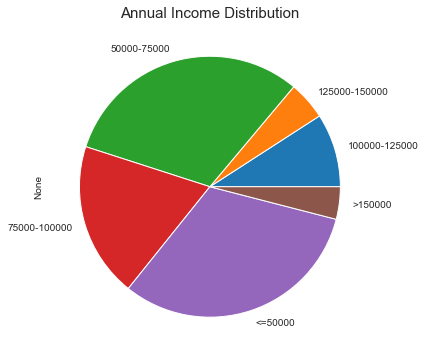

In [243]:
plt.rcParams['figure.figsize']=(6,6)
def inc_class(num):
    if num <= 50000:
        return '<=50000'
    elif num <= 75000:
        return '50000-75000'
    elif num <= 100000:
        return '75000-100000'
    elif num <= 125000:
        return '100000-125000'
    elif num <= 150000:
        return '125000-150000'
    else:
        return '>150000'

df2['inc_class']=df2['annual_inc'].apply(inc_class)
df2.groupby('inc_class').size().plot(kind='pie')
plt.title('Annual Income Distribution',fontsize=15)

<AxesSubplot:xlabel='inc_class', ylabel='int_rate'>

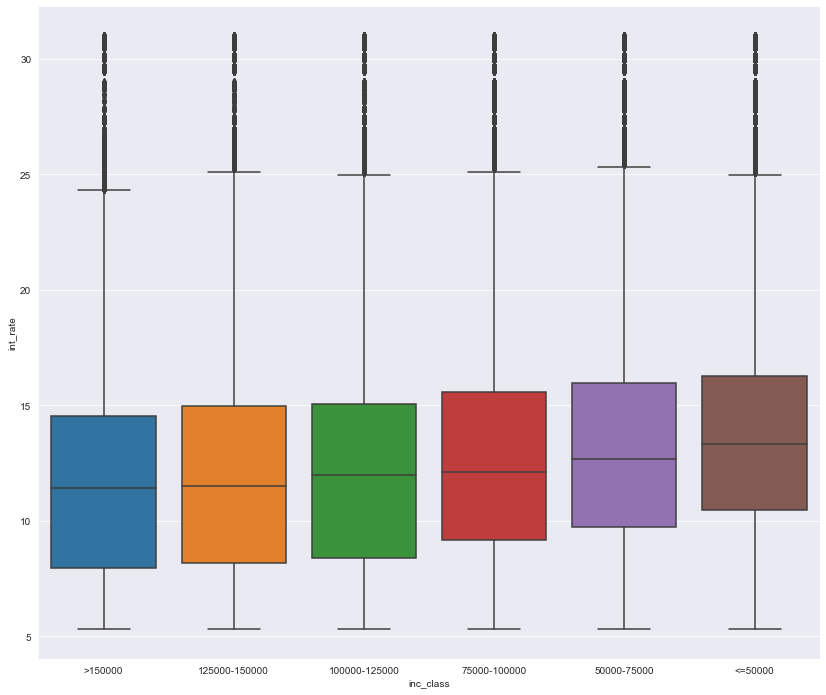

In [248]:
plt.figure(figsize = (14,12))
sorted_nb = df2.groupby(['inc_class'])['int_rate'].median().sort_values()
sns.boxplot(x='inc_class',y='int_rate',data=df2,order=list(sorted_nb.index))

### Dti

In [88]:
df2['dti'].describe()

count   2139958.0000000000
mean         18.0931638238
std           8.4254083994
min          -1.0000000000
25%          11.7800000000
50%          17.6000000000
75%          24.0400000000
max          49.9600000000
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Distribution')

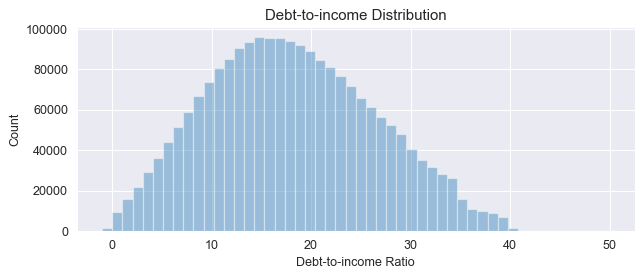

In [93]:
# compare with two outcomes whether dti is more than 0 or not
plt.figure(figsize=(8,3),dpi=90)
sns.set_style('darkgrid')
sns.distplot(df.loc[df['dti'].notnull()&(df['dti']>-2),'dti'],kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Distribution')

Text(0.5, 1.0, 'Debt-to-income Distribution')

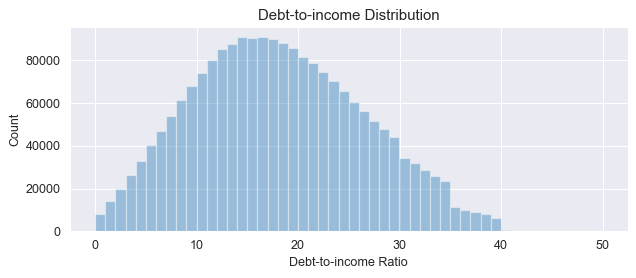

In [232]:
plt.figure(figsize=(8,3),dpi=90)
sns.set_style('darkgrid')
sns.distplot(df2['dti'],kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Distribution')

In [287]:
##
df2['cut_dti'] = pd.qcut(df2['dti'], q=5)

In [290]:
cut_bins = [0,10.55,15.36,19.99,25.64,50]
df2['cut_dti'] = pd.cut(df2['dti'], bins=cut_bins)

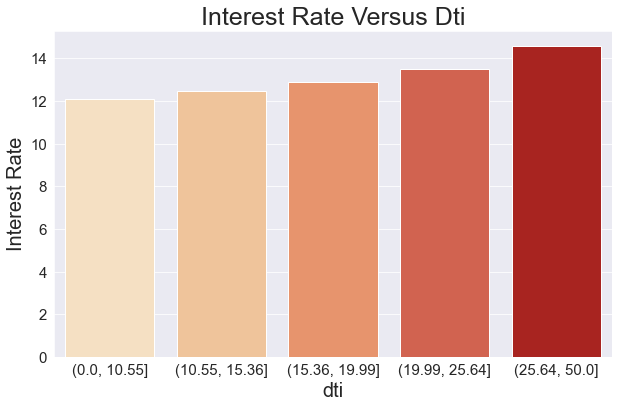

In [294]:
plt.figure(figsize=(10,6))
plot_data = df2.groupby('cut_dti')['int_rate'].mean()
ax = sns.barplot(x=plot_data.index,y=plot_data.values,palette='OrRd')
ax = plt.xlabel('dti',fontsize=20)
ax = plt.ylabel('Interest Rate',fontsize=20)
ax = plt.title('Interest Rate Versus Dti',fontsize=25)
plt.tick_params(labelsize=15)

### Utilization Rate VS interest Rate

In [92]:
df2['revol_util'].describe()

count   2138406.0000000000
mean         50.5159027191
std          24.6244731961
min           0.0000000000
25%          31.8000000000
50%          50.5000000000
75%          69.5000000000
max         892.3000000000
Name: revol_util, dtype: float64

In [84]:
df2.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

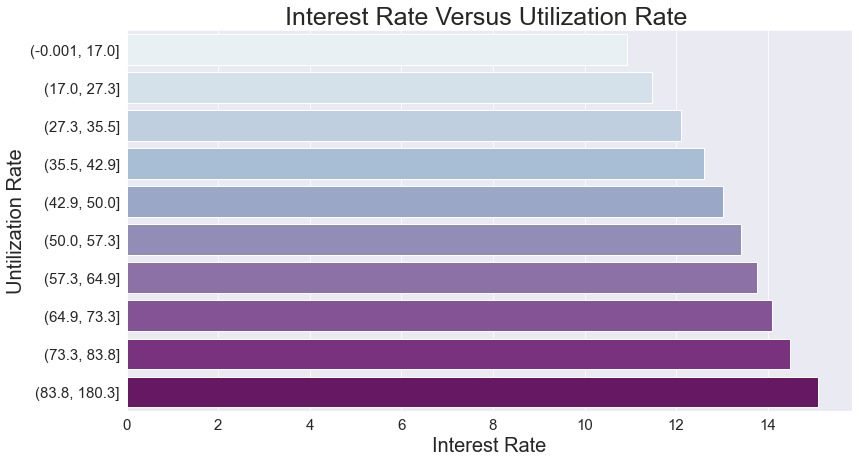

In [326]:
#plt.figure(figsize=(10,6))
#df2['cut_revol_util'] = pd.qcut(df2['revol_util'], q=10)
#df2.groupby('cut_revol_util')['int_rate'].mean().plot.bar()
#plt.title('Interest Rate VS Utilization Rate',fontsize=25)


plt.figure(figsize=(13,7))
plot_data = df2.groupby('cut_revol_util')['int_rate'].mean()
ax = sns.barplot(y=plot_data.index,x=plot_data.values,palette='BuPu')
ax = plt.ylabel('Untilization Rate',fontsize=20)
ax = plt.xlabel('Interest Rate',fontsize=20)
ax = plt.title('Interest Rate Versus Utilization Rate ',fontsize=25)
plt.tick_params(labelsize=15)


### Home_owenership

In [484]:
df2['home_ownership'].value_counts(dropna=False)

MORTGAGE    917556
RENT        807700
OWN         204065
ANY            820
OTHER          172
NONE            45
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

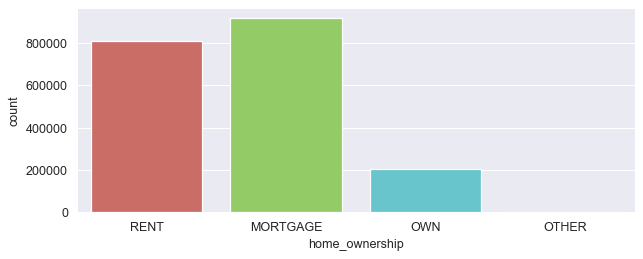

In [485]:
#revise y axis
plt.figure(figsize=(8,3),dpi=90)
df2['home_ownership'].replace(['NONE','ANY'],'OTHER',inplace=True)
sns.countplot(x='home_ownership',data=df2,palette='hls')

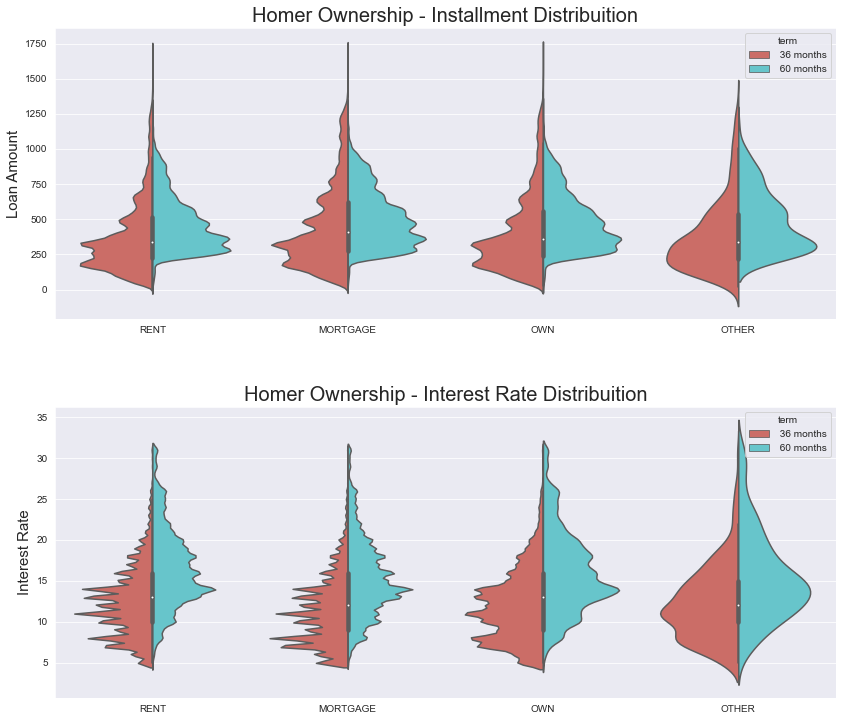

In [486]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x="home_ownership",y="installment",data=df2,
               kind="violin",
               split=True,palette="hls",
                  hue="term")
g.set_title("Homer Ownership - Installment Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="home_ownership",y="int_rate",data=df2,
               kind="violin",
               split=True,palette="hls",
               hue="term")
g1.set_title("Homer Ownership - Interest Rate Distribuition", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Interest Rate", fontsize=15)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()

### Employment Length

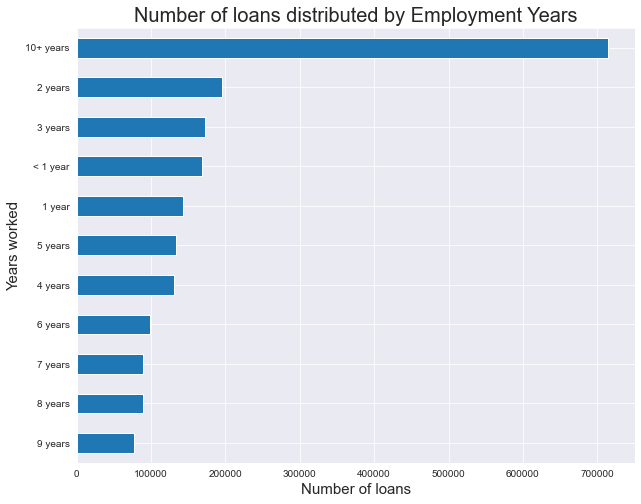

In [487]:
# Employment Length and Number of Loans
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(10,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15)
plt.show()

No handles with labels found to put in legend.


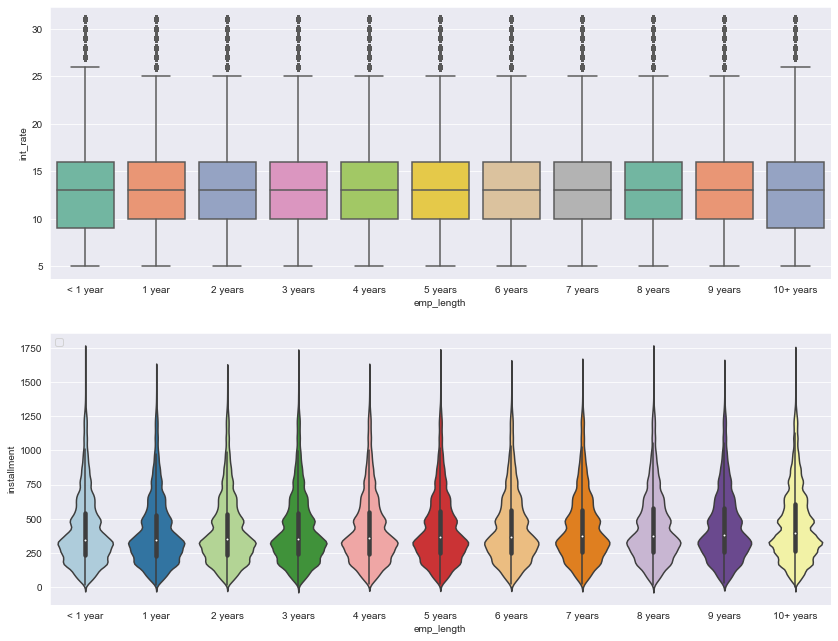

In [488]:
# Employment length in years. Possible values are between 0 and 10 where 0 means 
# less than one year and 10 means ten or more years. 

emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
           '4 years', '5 years', '6 years', '7 years',
           '8 years', '9 years', '10+ years']

fig, ax = plt.subplots(2,1, figsize=(14,11))
g = sns.boxplot(x="emp_length", y="int_rate", data=df2,
                ax=ax[0], palette="Set2",
                order=emp_ord)

z = sns.violinplot(x="emp_length", y="installment",data=df2, 
                   ax=ax[1], palette="Paired",
                   order=emp_ord)
               
plt.legend(loc='upper left')
plt.show()

### Verfication Status

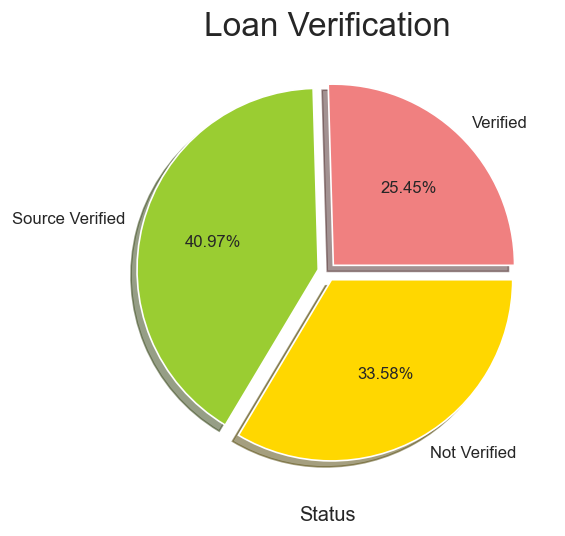

In [489]:
# Visualize the verification status
verification_status = [(df2['verification_status']=='Verified').sum(),
                      (df2['verification_status']=='Source Verified').sum(),
                      (df2['verification_status']=='Not Verified').sum()]

title_font, xlabel_font, ylabel_font = 20, 12, 12  
colors=['lightcoral','yellowgreen', 'gold', 'skyblue','red','cyan']

plt.figure(figsize=(5,5),dpi=120)
plt.pie(verification_status, labels = ('Verified','Source Verified', 'Not Verified'), 
        explode = (0.05, 0.05, 0.05), colors = colors[0:3],shadow=True,startangle = 360, autopct='%1.2f%%')
plt.title("Loan Verification", fontsize = title_font)
plt.xlabel('Status',fontsize = xlabel_font)
plt.show()


### Loan amount VS verification status

Text(0.5, 1.0, 'Verification and Loan amount')

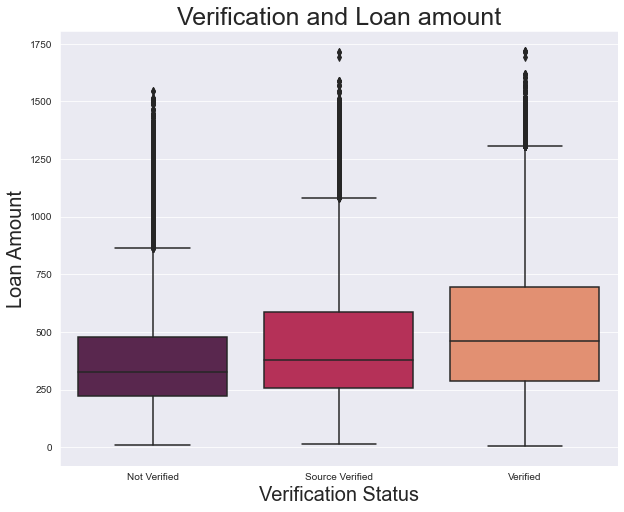

In [490]:
# Verification status and loan amount 
plt.figure(figsize=(10,8))
sns.boxplot(x=df2['verification_status'],y=df2['installment'],palette="rocket")
plt.xlabel('Verification Status',fontsize=20)
plt.ylabel('Loan Amount',fontsize=20)
plt.title('Verification and Loan amount',fontsize=25)

Text(0.5, 1.0, 'Verification and Interest rate')

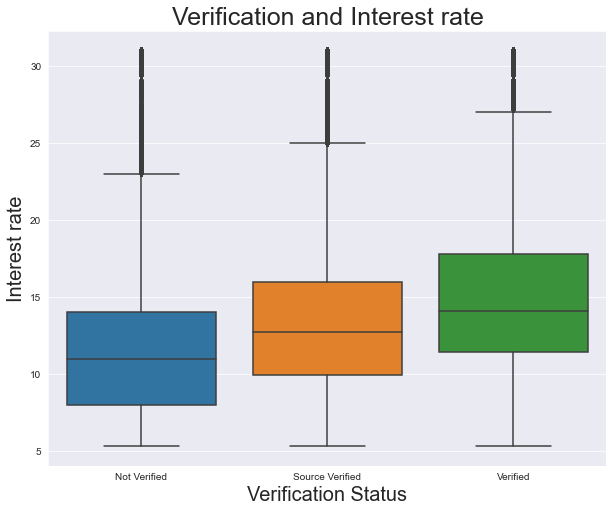

In [491]:
# Verification status and loan amount 
plt.figure(figsize=(10,8))
sns.boxplot(x=df['verification_status'],y=df['int_rate'])
plt.xlabel('Verification Status',fontsize=20)
plt.ylabel('Interest rate',fontsize=20)
plt.title('Verification and Interest rate',fontsize=25)

### Term vs Loan amount

In [492]:
df2['term'].value_counts(dropna=False)

 36 months    1381263
 60 months     549095
Name: term, dtype: int64

In [493]:
df2['term'].value_counts(normalize=True)

 36 months   0.7155475824
 60 months   0.2844524176
Name: term, dtype: float64

In [494]:
# Analyze the correlation about term, interest rate and loan amount
df2.groupby('term').agg({'int_rate':np.mean,'installment':np.mean},axis=1).reset_index()

,term,int_rate,installment
0,36 months,11.8827804698,410.6809551841
1,60 months,15.9691911236,493.4755504966


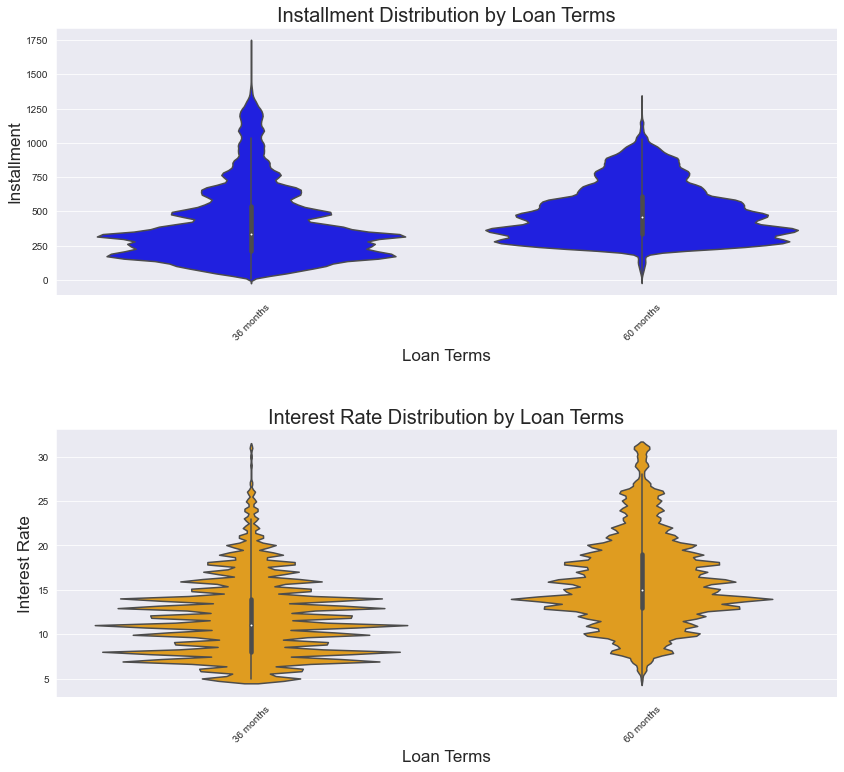

In [495]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x='term', y="installment",
                   data=df2, color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Terms", fontsize=17)
g.set_ylabel("Installment", fontsize=17)
g.set_title("Installment Distribution by Loan Terms", fontsize=20)

plt.subplot(212)
g1 = sns.violinplot(x='term', y="int_rate",
                   data=df2, color='orange')
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Terms", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Interest Rate Distribution by Loan Terms", fontsize=20)

plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

### Purpose

In [496]:
df2['purpose'].value_counts()

debt_consolidation    1096951
credit_card            443184
home_improvement       121739
other                  117999
major_purchase          43416
medical                 22230
small_business          21456
car                     20817
vacation                13359
moving                  13276
house                   12016
wedding                  2274
renewable_energy         1254
educational               387
Name: purpose, dtype: int64

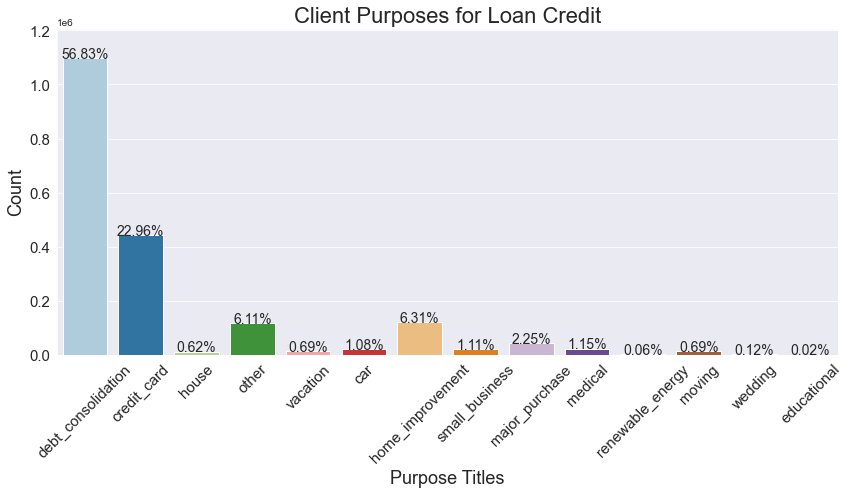

In [497]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df2, 
                  palette="Paired")
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.tick_params(labelsize=15)
plt.show()

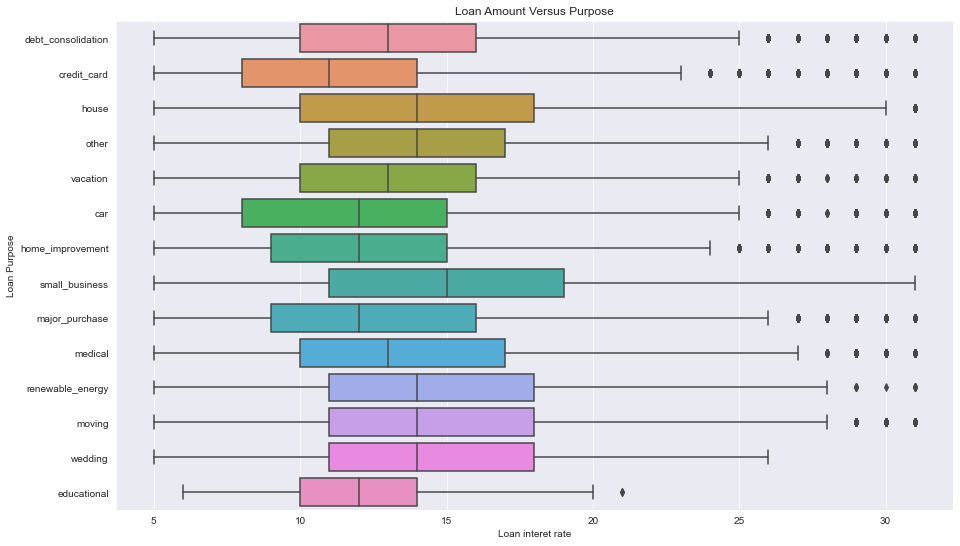

In [498]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(y="purpose", x="int_rate", data=df2)
ax = plt.xlabel('Loan interet rate')
ax = plt.ylabel('Loan Purpose')
ax = plt.title('Loan Amount Versus Purpose')

###  Revol_Balance VS Interest Rate

In [499]:
df2['cut_revol_bal'] = pd.qcut(df2['revol_bal'], q=10)

<AxesSubplot:xlabel='cut_revol_bal'>

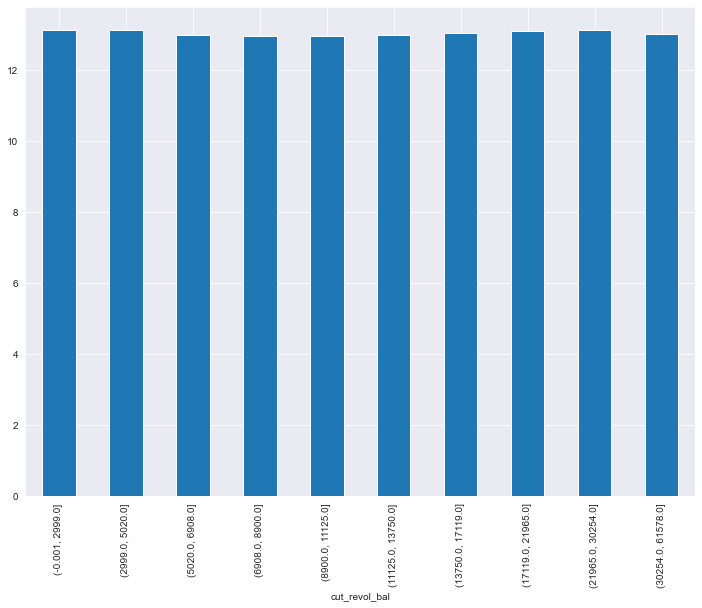

In [500]:
plt.figure(figsize=(12,9))
df2.groupby('cut_revol_bal')['int_rate'].mean().plot.bar()

### total_acc VS  Interest Rate

In [501]:
df2['cut_total_acc'] = pd.qcut(df2['total_acc'], q=10)

<AxesSubplot:xlabel='cut_total_acc'>

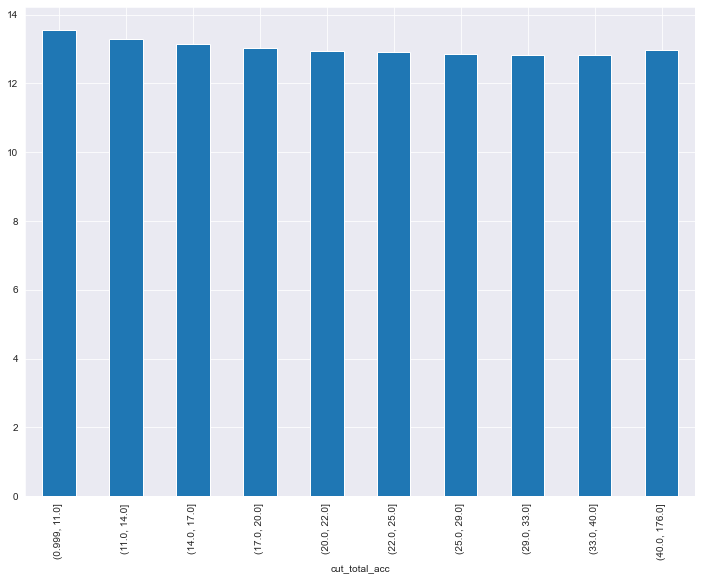

In [502]:
plt.figure(figsize=(12,9))
df2.groupby('cut_total_acc')['int_rate'].mean().plot.bar()

### Pub_rec VS interest Rate

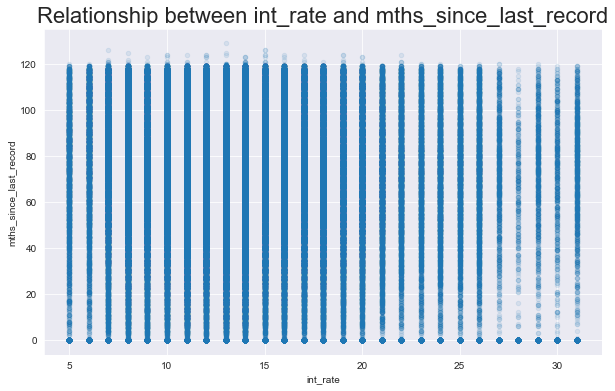

In [503]:
df2.plot('int_rate', 'mths_since_last_record', kind = 'scatter', figsize=(10,6), alpha=0.1)
plt.title('Relationship between int_rate and mths_since_last_record', fontsize=22);

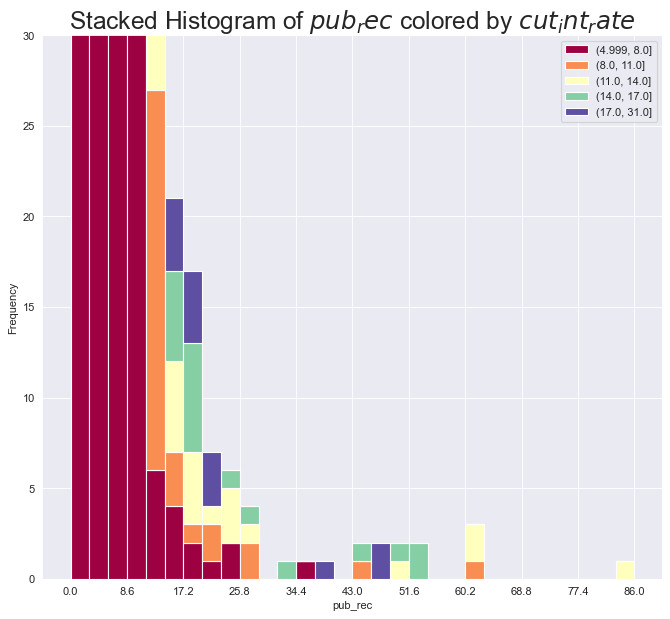

In [504]:
# Import Data

df = df2
df['cut_int_rate'] = pd.qcut(df2['int_rate'], q = 5)

x_var = 'pub_rec'

groupby_var = 'cut_int_rate'


df_agg = df2.loc[:, [x_var, groupby_var]].groupby(groupby_var)

vals = [df[x_var].values.tolist() for i, df in df_agg]


# Draw

plt.figure(figsize=(10,9), dpi= 80)

colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]

n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])


# Decoration

plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})

plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)

plt.xlabel(x_var)

plt.ylabel("Frequency")

plt.ylim(0, 30)

plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])

plt.show()

In [505]:
df2.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'cut_del_class',
       'cut_revol_bal', 'cut_total_acc', 'cut_int_rate'],
      dtype='object')

### delinq_2yrs vs interest rate

Text(0.5, 1.0, '30+ Days Delinquency Distribution')

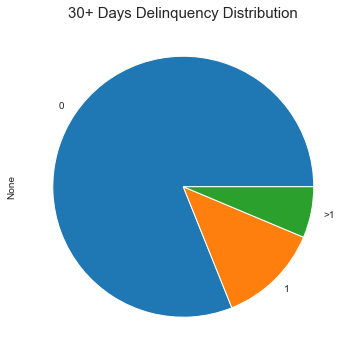

In [506]:
plt.rcParams['figure.figsize']=(6,6)
def inc_class_deling(num):
    if num == 0:
        return '0'
    elif num == 1:
        return '1'
    else:
        return '>1'

df2['cut_del_class']=df2['delinq_2yrs'].apply(inc_class_deling)
df2.groupby('cut_del_class').size().plot(kind='pie')
plt.title('30+ Days Delinquency Distribution',fontsize=15)

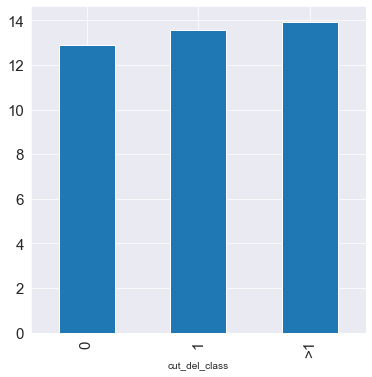

In [507]:
df2.groupby('cut_del_class')['int_rate'].mean().plot.bar()
plt.tick_params(labelsize=15)
plt.show()

In [508]:
df2.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'cut_del_class',
       'cut_revol_bal', 'cut_total_acc', 'cut_int_rate'],
      dtype='object')

## Preprocessing

In [509]:
num_data=df3.select_dtypes('number').columns.values
num_data

array(['int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc'], dtype=object)

In [510]:
num_features=df3[['int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc']]

# standarize numerical variable
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [511]:
df3.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'cut_del_class',
       'cut_revol_bal', 'cut_total_acc', 'cut_int_rate'],
      dtype='object')

In [512]:
# dummfied the categorical data
categorical_data=['term', 'home_ownership','verification_status','purpose','emp_length']

df_dum=pd.get_dummies(df3,columns=categorical_data,drop_first=True)
df_dum.head()

,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,pub_rec,revol_bal,...,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,14,84.9200000000,55000.0000000000,18.2400000000,0.0000000000,1.0000000000,0.0000000000,45.0000000000,1.0000000000,4341,...,1,0,0,0,0,0,0,0,0,0
1,19,777.2300000000,90000.0000000000,26.5200000000,0.0000000000,0.0000000000,71.0000000000,75.0000000000,1.0000000000,12315,...,1,0,0,0,0,0,0,0,0,0
2,18,180.6900000000,59280.0000000000,10.5100000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,4599,...,0,0,0,0,0,1,0,0,0,0
3,19,146.5100000000,92000.0000000000,16.7400000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,5468,...,1,0,0,0,0,0,0,0,0,0
4,16,731.7800000000,57250.0000000000,26.3500000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,829,...,1,0,0,0,0,0,0,0,0,0


In [513]:
df_dum.columns

Index(['int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'cut_del_class',
       'cut_revol_bal', 'cut_total_acc', 'cut_int_rate', 'term_ 60 months',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years'

In [529]:
X_clean=df_dum[['installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'term_ 60 months',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']]

Y_clean = df_dum['int_rate']

### Classfier Selection

In [519]:
validation_size = 0.30
seed = 10
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_clean, Y_clean,
                                                                    test_size = validation_size, random_state = seed)

### Linear Regression

In [520]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [521]:
y_predict=lr.predict(X_test)

In [522]:
# model evaluation for testing set
mae=metrics.mean_absolute_error(y_test,y_predict)
mse=metrics.mean_squared_error(y_test,y_predict)
r2=metrics.r2_score(y_test,y_predict)

In [523]:
mae

2.8913616874676986

In [524]:
mse

13.991296411938578

In [525]:
r2

0.39753840739318913

In [ ]:
# data standardization with  sklearn---numerical data
#from sklearn.preprocessing import StandardScaler

# copy of datasets
#X_train_stand = X_train.copy()
#X_test_stand = X_test.copy()

# numerical features
#num_cols =['installment', 'annual_inc', 'dti', 'delinq_2yrs','inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc']
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
 X_train_stand.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(X_train_stand,y_train)

In [ ]:
X_train_stand.head()

In [ ]:
y_predict=lr.predict(X_test_stand)

In [ ]:
# model evaluation for testing set
mae=metrics.mean_absolute_error(y_test,y_predict)
mse=metrics.mean_squared_error(y_test,y_predict)
r2=metrics.r2_score(y_test,y_predict)

In [ ]:
validation_size = 0.30
seed = 10
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_clean, Y_clean,
                                                                    test_size = validation_size, random_state = seed)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(X_train,y_train)

In [ ]:
#prepare data for lightgbm
df_cate=df3
for cate in df_cate:
     X[cate] = X[cate].astype('category') 
y = train['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
d_train = lgb.Dataset(X_train, y_train)
d_valid = lgb.Dataset(X_test,y_test)

watchlist=[d_valid,d_train]

In [ ]:
#lightgbm parameters
params = {}
params['learning_rate'] = 0.5
params['application'] = 'binary'
params['max_depth'] = 10
params['num_leaves'] = 2**6
params['verbosity'] = 0
params['metric'] = 'auc'
params["boosting type"] = "random_forest"

#training lightGBM
evals_result = {}
lgb_model = lgb.train(params, train_set=d_train, num_boost_round=500, valid_sets=watchlist,verbose_eval=20,\
                      evals_result=evals_result)

In [ ]:
# plot feature importance
lgb.plot_importance(lgb_model, max_num_features=10)
plt.savefig("features.png",bbox_inches="tight")

In [ ]:
#plot AUC Score
lgb.plot_metric(evals_result, metric='auc')
plt.rcParams['figure.figsize'] = [8, 5]
plt.savefig("metric.png",bbox_inches="tight")

# XGB

In [530]:
X_clean.columns

Index(['installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'term_ 60 months',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [531]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

# Splitting
train_X, test_X, train_y, test_y = train_test_split(X_clean, Y_clean,
                      test_size = 0.3, random_state = 123)
  
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators =200, seed = 123,n_jobs=-1)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))


[22:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  3.223223


In [532]:
r2=metrics.r2_score(test_y,pred)
r2

0.5527159168214777

In [533]:
print(xgb_r.feature_importances_)

[0.01820399 0.02574596 0.01670651 0.02007584 0.060961   0.01580571
 0.01685525 0.01070054 0.01978177 0.03952714 0.00618493 0.26021504
 0.00192073 0.0159432  0.04611214 0.06474714 0.0903784  0.09375337
 0.02065382 0.00125736 0.00305506 0.01525608 0.00128932 0.01641187
 0.02340744 0.03602064 0.00488534 0.03965297 0.01046567 0.00402572]


<BarContainer object of 30 artists>

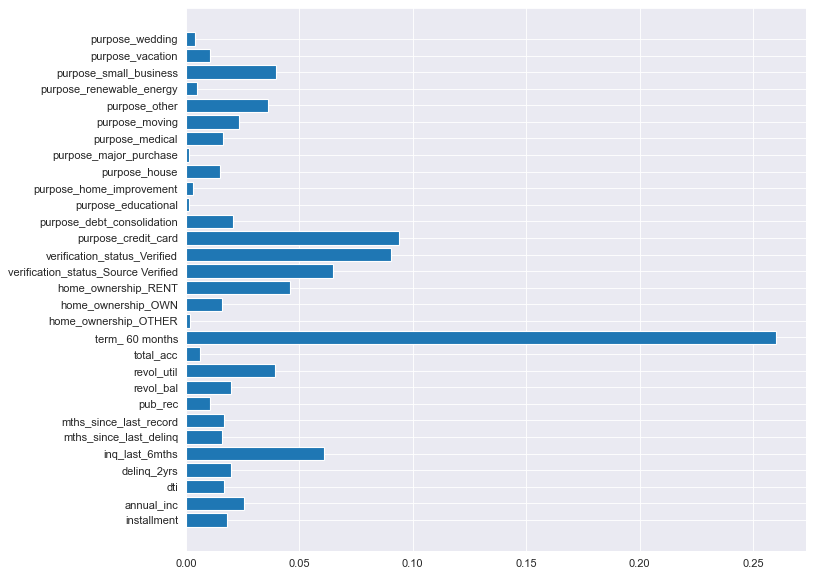

In [535]:
plt.figure(figsize=(10,9), dpi= 80)
plt.barh(X_clean.columns, xgb_r.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

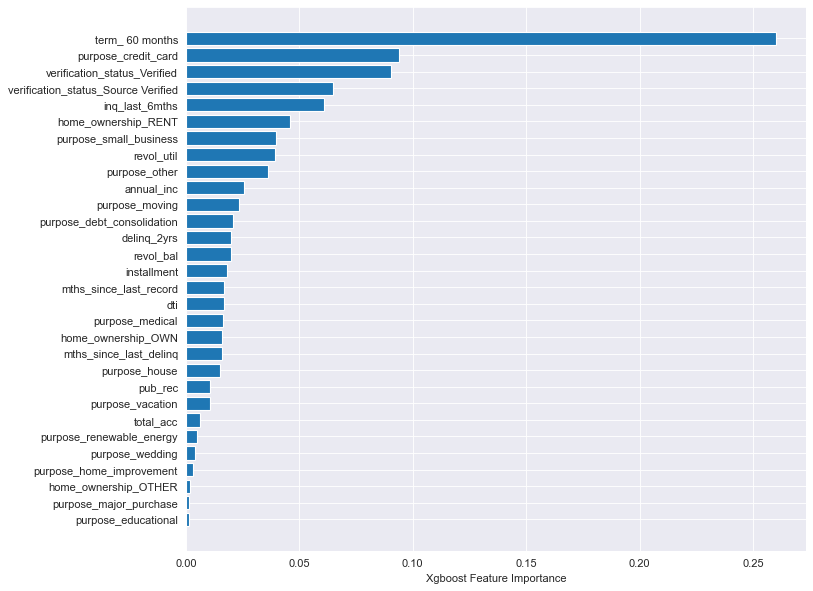

In [536]:
plt.figure(figsize=(10,9), dpi= 80)
sorted_idx = xgb_r.feature_importances_.argsort()
plt.barh(X_clean.columns[sorted_idx], xgb_r.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [550]:
df3.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'cut_del_class',
       'cut_revol_bal', 'cut_total_acc', 'cut_int_rate'],
      dtype='object')

In [553]:
X1=df3[['term','installment','home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'cut_del_class',
       'cut_revol_bal', 'cut_total_acc', 'cut_int_rate']]
Y1=df3[ 'int_rate']

In [554]:
from sklearn.tree import DecisionTreeRegressor 

In [562]:
# create a regressor object
regressor = DecisionTreeRegressor(min_samples_split=50 ,
                                  max_features=10, random_state=654) 

In [563]:
validation_size = 0.30
seed = 10
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_clean, Y_clean,
                                                                    test_size = validation_size, random_state = seed)

In [564]:
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_features=10, min_samples_split=50, random_state=654)

In [565]:
y_pred = regressor.predict(X_test)

In [566]:
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  3.947919


In [567]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.3288681668989525